In [1]:
from inventory_impairment_class import InventoryImpairment
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_excel('./data/inventory_data_new.xlsx')

In [3]:
model = InventoryImpairment()
model.set_forecast_file("./forecast/timesnet.json")
# Fit the model
model.fit(data, variability=0.5)

Calculating monthly data...
Creating auto arima model...
Creating auto encoder model...



Calculating impairment index...
Model fitted.


In [4]:
# Predict the impairment
impairment = model.predict(tolerance=1.5, threshold='mean')

In [5]:
model.stock_management()

Recommendation for 114230822: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 415497.93900379597, Current stock: 66500.0, Fair price: 0.06405846728536801
Recommendation for 115030252: Reduce stock. Projected sales: 4442.823305298466, Current stock: 23000.0, Fair price: 0.08155930230189945
Recommendation for 115070602: Reduce stock. Projected sales: 10907.102712314003, Current stock: 100000.0, Fair price: 0.11162032464667561
Recommendation for 115130209: Reduce stock. Projected sales: 2343.740462520615, Current stock: 9600.0, Fair price: 0.2819781461585059
Recommendation for 115170581: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 444754.6633289521, Current stock: 42000.0, Fair price: 0.06926930667207522
Recommendation for 116211401: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 485421.8079469129, Current stock: 36000.0, Fair price: 0.105585998104

In [13]:
impairment.head(10)

,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,data_darrera_entrada,...,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023,auto_arima_index,autoencoder_index,impairment_index,merged_indexs,fair_price,new_value,depreciation
0,114230822.0,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,0.235256,2024-02-29 00:00:00,...,66500.0,2292.96,0.034481,0.249710,0.003754,0.000000,0.253464,0.064058,0.034481,0.000000
1,115030252.0,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-0.012839,-0.142771,2024-01-24 00:00:00,...,23000.0,1777.15,0.077267,0.000000,0.071577,0.051069,0.122646,0.081559,0.077267,0.000000
2,115070602.0,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-0.011934,-0.105171,2024-02-06 00:00:00,...,100000.0,5732.32,0.057323,0.000000,0.004580,0.000000,0.004580,0.111620,0.057323,0.000000
3,115130209.0,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,0.018620,0.083465,2023-12-21 00:00:00,...,9600.0,2298.10,0.239385,0.000000,0.004997,0.007279,0.012276,0.281978,0.239385,0.000000
4,115170581.0,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,-0.000830,-0.011311,2024-02-09 00:00:00,...,42000.0,2140.13,0.050955,0.241989,0.002440,0.000000,0.244429,0.069269,0.050955,0.000000
5,116211401.0,180000.0,20998.44,0.116658,1533600.0,156152.48,0.101821,-0.014837,-0.127185,2024-02-29 00:00:00,...,36000.0,3143.70,0.087325,0.137373,0.000000,0.000000,0.137373,0.105586,0.087325,0.000000
6,116490250.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,2024-02-14 00:00:00,...,26437.0,2211.43,0.083649,0.218996,0.004688,0.000000,0.223684,-0.003613,-0.003613,0.087262
7,116490259.0,152600.0,24814.65,0.162612,152600.0,26612.66,0.174395,0.011783,0.072458,2024-02-21 00:00:00,...,15400.0,1386.79,0.090051,0.584127,0.003979,0.000000,0.588106,0.137688,0.090051,0.000000
8,118030902.0,711900.0,100467.24,0.141125,741400.0,109717.26,0.147987,0.006861,0.048617,2024-01-31 00:00:00,...,56000.0,6892.27,0.123076,0.511008,0.004147,0.000000,0.515154,0.106797,0.106797,0.016279
9,118030904.0,376560.0,56967.80,0.151285,308000.0,51353.82,0.166733,0.015448,0.102115,2024-02-21 00:00:00,...,14700.0,1809.22,0.123076,0.000000,0.002851,0.000000,0.002851,0.188596,0.123076,0.000000


In [7]:
total_value = 0
count = 0
for index, element in impairment[impairment["fair_price"] == impairment["new_value"]].iterrows():
    total_value += element["valor_total_stock_2023"] - element["stock_final_2023"] * element["fair_price"]
    count += 1
print(f"Valor total devaluat: {total_value}, en un total de {count} elements")

Valor total devaluat: 339319.73753635254, en un total de 62 elements


In [8]:
import numpy as np
impairment['depreciation'] = impairment["cost_unitari_stock_2023"]  - impairment["new_value"]

max_depreciation_row = impairment.loc[np.argsort(-impairment['depreciation'], axis=0)[4] ]

print("Element with the most depreciation:")
print(max_depreciation_row)

Element with the most depreciation:
material                                                   136170186.0
unitats_2022                                                  746900.0
vendes_2022                                                  104135.39
preu_venda_unitari_2022                                       0.139423
unitats_2023                                                   22000.0
vendes_2023                                                    2598.75
preu_venda_unitari_2023                                       0.118125
variacio_preu_venda_unitari_2022_2023                        -0.021298
proporcio_variacio_preu_venda_unitari_2022_2023              -0.152761
data_darrera_entrada                               2023-02-09 00:00:00
dies_ultima_entrada                                              325.0
data_darrera_sortida                               2023-03-10 00:00:00
dies_ultima_sortida                                              296.0
diferencia_entrada_sortida               

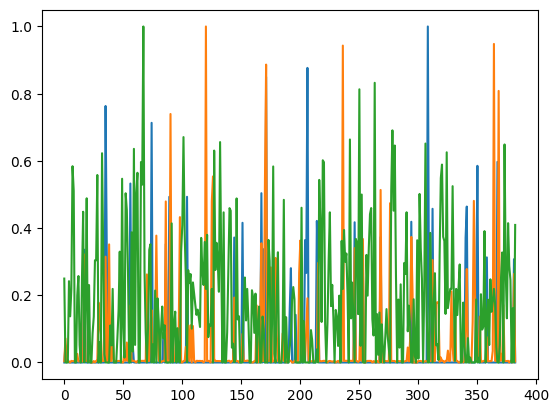

In [9]:
import matplotlib.pyplot as plt
plt.plot(impairment["impairment_index"])
plt.plot(impairment["autoencoder_index"])
plt.plot(impairment["auto_arima_index"])

In [10]:
# Explain the model
ebm, df, y = model.explain()

Mean Squared Error for the EBM model used to explain the model: 0.07683725603237439


<!-- http://127.0.0.1:7001/2255611540816/ -->

In [11]:
from interpret import show
show(ebm.explain_local(df, y))

<!-- http://127.0.0.1:7001/2255673776400/ -->